<a href="https://colab.research.google.com/github/Rok-sana/ML-course/blob/main/Homework_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     GridSearchCV)

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

from sklearn.ensemble import StackingClassifier

from sklearn.metrics import (mean_absolute_error,
                             accuracy_score,
                             mean_squared_error,
                             confusion_matrix,
                             classification_report,
                             roc_auc_score, 
                             f1_score)

from sklearn import preprocessing

from sklearn.preprocessing import(MinMaxScaler,
                                  StandardScaler,
                                  LabelEncoder)

from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import Rank2D
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions


In [ ]:
credData = pd.read_csv('crx.data', sep=",", header = None, na_values = "?")

In [ ]:
credData.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10','A11', 'A12', 'A13', 'A14','A15', 'A16']

In [ ]:
credData.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [ ]:
credData.A16.value_counts()

-    383
+    307
Name: A16, dtype: int64

In [ ]:
credData["A16"] = np.where(credData["A16"]=='+', 1, 0)

In [ ]:
credData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.4+ KB


In [ ]:
df = credData.dropna(axis = 0)

In [ ]:
df.replace('?', None)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [ ]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [ ]:
df = df.apply(pd.to_numeric, errors='ignore')

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [ ]:
categorical_data = pd.get_dummies(categorical_data)

In [ ]:
y = numeric_data['A16']

In [ ]:
numeric_data = numeric_data.drop(["A16"], axis=1).astype('int')

In [ ]:
X = pd.concat([categorical_data,numeric_data],axis = 1)

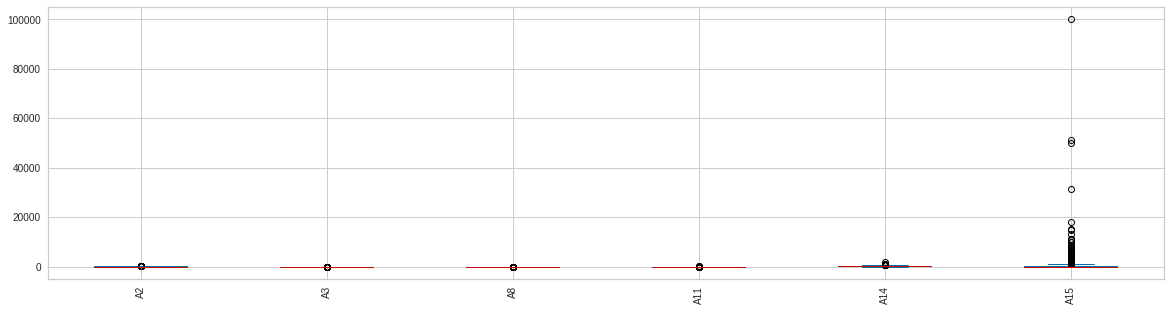

In [ ]:
numeric_data.plot.box(figsize=(20,5), rot=90)

In [ ]:
minmaxScaler = preprocessing.MinMaxScaler()
X_full_df = pd.DataFrame(minmaxScaler.fit_transform(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_full_df, y, test_size=0.3, random_state=123)

**Implement the bagging technique with the base learner as the logistic regression model.**



In [ ]:
base_estimator = LogisticRegression()
bagging_ensemble_model = BaggingClassifier(
    base_estimator=base_estimator, 
    n_estimators=15, 
    max_samples=0.7,
    max_features=0.8,
    random_state=123,
    verbose=2
)

In [ ]:
bagging_ensemble_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


BaggingClassifier(base_estimator=LogisticRegression(), max_features=0.8,
                  max_samples=0.7, n_estimators=15, random_state=123,
                  verbose=2)

In [ ]:
y_pred = bagging_ensemble_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 15 of 15 for this parallel run (total 15)...
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...
Building estimator 1 of 15 for this parallel run (total 15)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...
Building estimator 1 of 15 for this parallel run (total 15)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...
Building estimator 1 of 15 for this parallel run 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


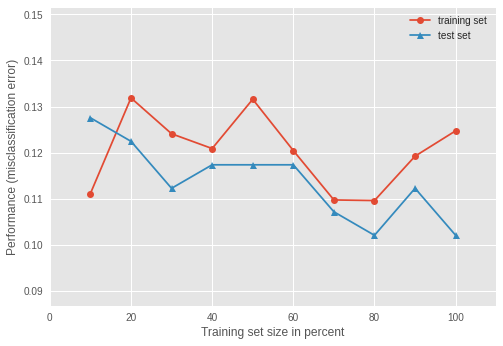

In [ ]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging_ensemble_model, print_model=False, style='ggplot')
plt.show()

The figure above shows learning curves for the bagging tree ensemble. We can see an average error of 
0.11
 on the training data. The smallest gap between training and test errors occurs at around 70% of the training set size.

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.898

[[94 13]
 [ 7 82]]


              precision    recall  f1-score   support

           0       0.93      0.88      0.90       107
           1       0.86      0.92      0.89        89

    accuracy                           0.90       196
   macro avg       0.90      0.90      0.90       196
weighted avg       0.90      0.90      0.90       196



**Implement boosting with random forest as the base learner.**

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boosting_ensemble_model = AdaBoostClassifier(
    base_estimator=clf,
    n_estimators=10, 
    random_state=123
)

In [ ]:
boosting_ensemble_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1),
                   n_estimators=10, random_state=123)

In [ ]:
y_pred = boosting_ensemble_model.predict(X_test)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.867

[[91 16]
 [10 79]]


              precision    recall  f1-score   support

           0       0.90      0.85      0.88       107
           1       0.83      0.89      0.86        89

    accuracy                           0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



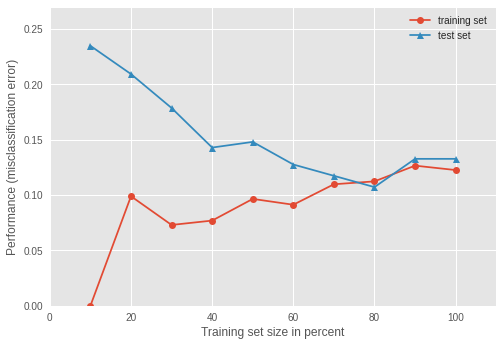

In [ ]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boosting_ensemble_model, print_model=False, style='ggplot')
plt.show()

The figure above shows learning curves for the boosting  ensemble. We can see an average error of 0.11 on the training data. The smallest gap between training and test errors occurs at around 80% of the training set size 

**Implement the stacking technique.**

Make the KNN and logistic regression models base learners and random forest a meta learner.



In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(random_state=123,solver='lbfgs', max_iter=100000)
rf = RandomForestClassifier(random_state=123)

base_learners = [
                 ('knn', knn),
                 ('lr', lr)             
                ]



stacking_ensemble_model = StackingClassifier(estimators= base_learners, final_estimator=rf)


In [ ]:
stacking_ensemble_model.fit(X_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('lr',
                                LogisticRegression(max_iter=100000,
                                                   random_state=123))],
                   final_estimator=RandomForestClassifier(random_state=123))

In [ ]:
y_pred = stacking_ensemble_model.predict(X_test)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.781

[[94 13]
 [30 59]]


              precision    recall  f1-score   support

           0       0.76      0.88      0.81       107
           1       0.82      0.66      0.73        89

    accuracy                           0.78       196
   macro avg       0.79      0.77      0.77       196
weighted avg       0.79      0.78      0.78       196



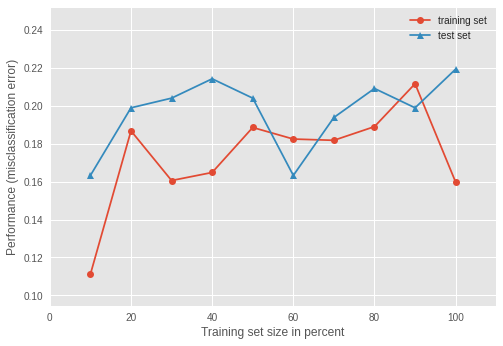

In [ ]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, stacking_ensemble_model, print_model=False, style='ggplot')
plt.show()

In [ ]:
params = {'knn__n_neighbors': [ 5, 10, 15, 20],
          'lr__C': [0.001, 0.01,0.1,1,10,100],
          'final_estimator__n_estimators': [10, 15, 20, 30, 40, 50],
          }

In [ ]:
grid = GridSearchCV(estimator=stacking_ensemble_model, 
                    param_grid=params, 
                    cv=5,
                    refit=True)

In [ ]:
stacking_ensemble_model.get_params().keys()

dict_keys(['cv', 'estimators', 'final_estimator__bootstrap', 'final_estimator__ccp_alpha', 'final_estimator__class_weight', 'final_estimator__criterion', 'final_estimator__max_depth', 'final_estimator__max_features', 'final_estimator__max_leaf_nodes', 'final_estimator__max_samples', 'final_estimator__min_impurity_decrease', 'final_estimator__min_samples_leaf', 'final_estimator__min_samples_split', 'final_estimator__min_weight_fraction_leaf', 'final_estimator__n_estimators', 'final_estimator__n_jobs', 'final_estimator__oob_score', 'final_estimator__random_state', 'final_estimator__verbose', 'final_estimator__warm_start', 'final_estimator', 'n_jobs', 'passthrough', 'stack_method', 'verbose', 'knn', 'lr', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights', 'lr__C', 'lr__class_weight', 'lr__dual', 'lr__fit_intercept', 'lr__intercept_scaling', 'lr__l1_ratio', 'lr__max_iter', 'lr__multi_class', 'lr__n_jobs', 'l

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('knn',
                                                       KNeighborsClassifier()),
                                                      ('lr',
                                                       LogisticRegression(max_iter=100000,
                                                                          random_state=123))],
                                          final_estimator=RandomForestClassifier(random_state=123)),
             param_grid={'final_estimator__n_estimators': [10, 15, 20, 30, 40,
                                                           50],
                         'knn__n_neighbors': [5, 10, 15, 20],
                         'lr__C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
print(grid.best_params_, grid.best_score_)

{'final_estimator__n_estimators': 40, 'knn__n_neighbors': 15, 'lr__C': 0.1} 0.8446249402771142


In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
lr = LogisticRegression(random_state=123,solver='lbfgs', max_iter=100000, C=0.1)
rf = RandomForestClassifier(random_state=123, n_estimators=40)

base_learners = [('knn', knn),('lr', lr)]

stc_model = StackingClassifier(estimators= base_learners, final_estimator=rf)


In [ ]:
stc_model.fit(X_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=15)),
                               ('lr',
                                LogisticRegression(C=0.1, max_iter=100000,
                                                   random_state=123))],
                   final_estimator=RandomForestClassifier(n_estimators=40,
                                                          random_state=123))

In [ ]:
y_pred = stc_model.predict(X_test)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.84

[[91 16]
 [16 73]]


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       107
           1       0.82      0.82      0.82        89

    accuracy                           0.84       196
   macro avg       0.84      0.84      0.84       196
weighted avg       0.84      0.84      0.84       196



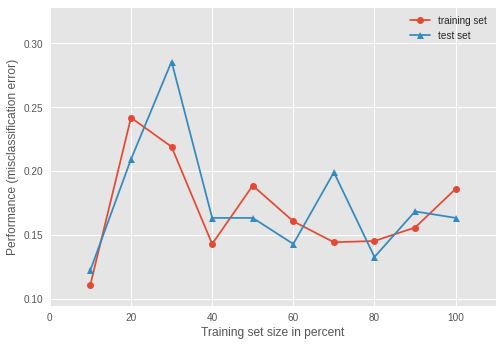

In [ ]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test,stc_model, print_model=False, style='ggplot')
plt.show()

After aplying Grid serach we have less gap between the training and test performance, and this indicates that the model isn't suffering from overfitting.
And the both of training and test error aresignificantly less, the model don't have underfitting the data